In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I2 = np.eye(2, dtype = complex)
tau_x, tau_y, tau_z, tau_0 = sigma_x, sigma_y, sigma_z, I2

# Parameters
m = 2    
t0, t, V = 0, 1, 3

S = 0.5  # splitting between the two copies

Nk = 201

kxs = np.linspace(-np.pi, np.pi, Nk)
kys = np.linspace(-np.pi, np.pi, Nk)
kzs = np.linspace(-np.pi, np.pi, Nk)

L = 30 #For OBC in y-direction in slab spectra of 4band semimetal

# Band structure

* Chern insulator

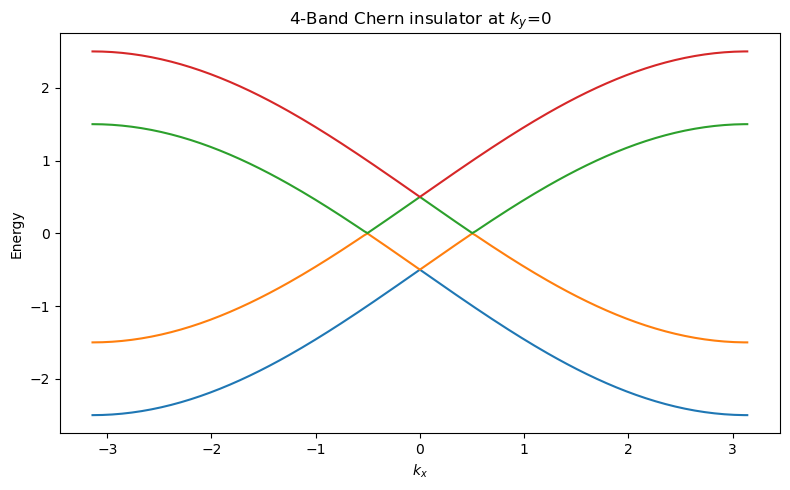

In [24]:
ky = 0

energies4 = []

# Hamiltonian and diagonalization

for kx in kxs:
    # 2×2 Chern insulator Hamiltonian H2
    H2 = np.sin(kx) * sigma_x + np.sin(ky) * sigma_y + (m - np.cos(kx) - np.cos(ky)) * sigma_z

    # 4×4: two copies of H2
    H4 = np.kron(H2, tau_0) + S * np.kron(I2, tau_z)

    eigs = np.linalg.eigvalsh(H4)
    energies4.append(eigs)

energies4 = np.array(energies4).T

# Plot
plt.figure(figsize=(8, 5))
for band in range(4):
    plt.plot(kxs, energies4[band], label=f'Band {band+1}')
plt.xlabel(r'$k_x$')
plt.ylabel('Energy')
plt.title('4‑Band Chern insulator at $k_y$=0')
plt.tight_layout()
plt.show()


* Weyl semimetal

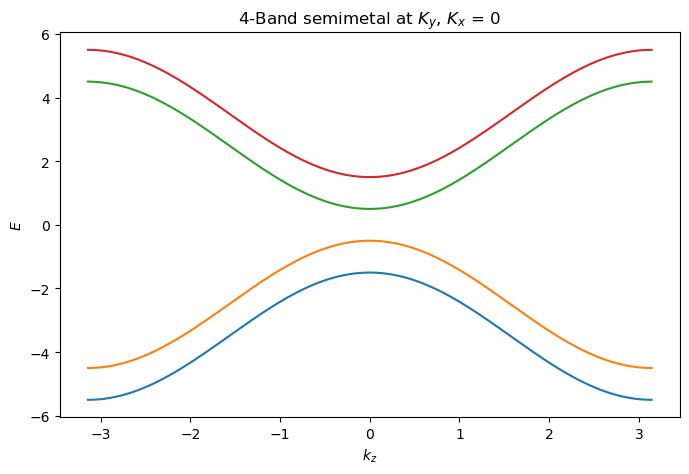

In [25]:
kx, ky = 0, 0

energies4 = []

for kz in kzs:
    # 2×2 Hamiltonian
    H2 = (-2*t0*np.sin(kx))*I2 +(2*t*np.sin(kx))* sigma_x + (2*t*np.sin(ky)) * sigma_y + (2*t*np.cos(kz)+2*t*(2-np.cos(kx)-np.cos(ky))-V)* sigma_z
    # 4×4 two copies +/- M
    H4 = np.kron(H2, tau_0) + S * np.kron(I2, tau_z) 

    eigs = np.linalg.eigvalsh(H4)
    energies4.append(eigs)

energies4 = np.array(energies4).T

# Plot 
plt.figure(figsize=(8,5))
for E in energies4:
    plt.plot(kzs, E)
plt.xlabel('$k_z$')
plt.ylabel('$E$')
plt.title('4‐Band semimetal at $K_y$, $K_x$ = 0')
plt.show()

# Slab spectrum of weyl semimetal

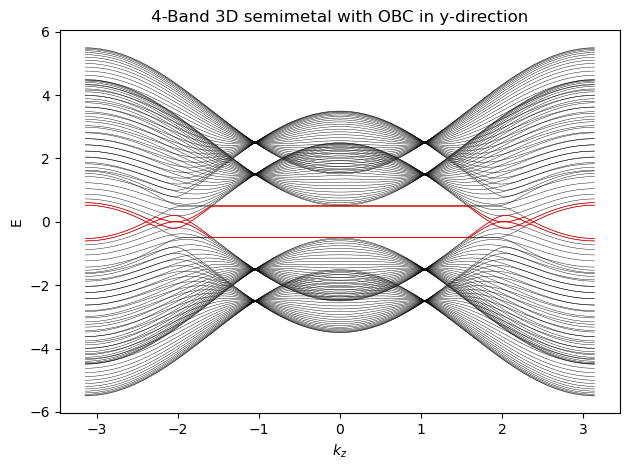

In [26]:
V0_2 = -1j*t * sigma_y -t*sigma_z
V0_4 = np.kron(V0_2, tau_0)

energies_slab = []

# Hamiltonian
for kz in kzs:
    H2_onsite = (-2*t0*np.sin(kx))*I2 +(2*t*np.sin(kx))* sigma_x + (2*t*np.cos(kz)+2*t*(2-np.cos(kx))-V)* sigma_z
    H0_4 = np.kron(H2_onsite, tau_0) + S * np.kron(I2, tau_z)
    H_slab = np.zeros((4*L, 4*L), dtype=complex)
    
    for j in range(L):
        sl = slice(4*j, 4*(j+1))
        H_slab[sl, sl] = H0_4
    
    for j in range(L - 1):
        sl_j = slice(4*j, 4*(j+1))
        sl_j1 = slice(4*(j+1), 4*(j+2))
        H_slab[sl_j, sl_j1] = V0_4
        H_slab[sl_j1, sl_j] = V0_4.conj().T

    # Diagonalize
    eigs = np.linalg.eigvalsh(H_slab)
    energies_slab.append(eigs)

energies_slab = np.array(energies_slab).T

# Plot
for b in range(4*L):
    plt.plot(kzs, energies_slab[b], color='black', linewidth =0.3)

# Highlight 4 bands (N.B changing iM will affect it)
mid = 2*L
for b in [mid-2, mid-1, mid, mid+1]:
    plt.plot(kzs, energies_slab[b], color='red', linewidth =0.5)

plt.xlabel('$k_z$')
plt.ylabel('E')
plt.title('4-Band 3D semimetal with OBC in y-direction')
plt.tight_layout()
plt.show()
